##### TOPIC: `Customer Churn Prediction and Retention Strategies for Vodafone Corporation`

`Project Understanding and Description:`

Inorder for Telco companies to grow their revenue generating base, it is important for them to attract new customers and at the same time avoid contract terminations (known as churn). In the real world different reasons cause customers to terminate their contracts, for example; better price offers and more interesting packages from competitors, bad service experiences with current provider or change of customers’ personal preferences and situations.

`Project Objective:`

Our objective in this project based on the data provided, is to leverage machine learning models to predict customer churn within Vodafone Corporation, a leading telecommunication company. Customer churn or the loss of customers over time, is a critical concern and understanding the factors influencing churn can inform proactive retention strategies for our client.

Our task is to train machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.

In this project, a basic machine learning pipeline based on a sample data set from Kaggle is build and performance of different model types is compared. The pipeline used for this example consists of 8 steps:

Step 1: Problem Definition

Step 2: Data Collection

Step 3: Exploratory Data Analysis (EDA)

Step 4: Feature Engineering

Step 5: Train/Test Split

Step 6: Model Evaluation Metrics Definition

Step 7: Model Selection, Training, Prediction and Assessment

Step 8: Hyperparameter Tuning/Model Improvement

`Key Components:`

`Data Collection and Exploration:`

Gather and explore data provided by the marketing and sales teams, encompassing customer demographics, service usage, and historical churn records.

`Hypothesis Formation:`

Develop hypotheses around potential factors influencing customer churn, considering aspects such as contract duration, service-related issues, pricing, billing preferences, and customer demographics.
`Customers with shorter contract durations are more likely to churn due to lower commitment.

`Null Hypothesis:`
There is no significant difference in churn likelihood between customers with shorter and longer contract durations.

`Alternative Hypothesis:` 
Customers with shorter contracts are more likely to churn than those with longer contracts.

Analytical Questions

#### Question 1: How does the length of a customer's contract term correlate with the likelihood of churn?

#### Question 2: What is the distribution of contract durations among customers who have churned compared to those who have not?

#### Question 3: What is the Proportion of customers with short contract durations using additional services

#### Question 4: How does the method of payment impact customer churn?

#### Question 5: Does the monthly and Total charges affect the probability of a customer churning?

`Data Preprocessing and Feature Engineering:`
Cleanse the data, handle missing values, and engineer relevant features to enhance model performance.


`Model Building:`
Select and train machine learning models to predict customer churn based on historical data.


`Evaluation and Key Indicators:`
Evaluate the models' performance and identify key indicators contributing to customer churn.


`Retention Strategies:`
Collaborate with business development, marketing, and sales teams to derive actionable insights from the models and formulate effective retention strategies.


`Model Deployment and Integration:`
Deploy the trained models into Vodafone's systems for real-time or batch predictions, integrating them seamlessly into the business processes.


`Documentation and Reporting:`
Document the entire data science process, including preprocessing steps, model selection, and deployment procedures. Provide clear and concise reports on model performance, key indicators, and recommended retention strategies.


`Continuous Improvement:`
Establish a feedback loop for continuous improvement, iterating on models and strategies based on real-world feedback and evolving business dynamics.
By the end of this project, we aim to equip Vodafone Corporation with predictive capabilities to anticipate customer churn and implement targeted retention measures, ultimately fostering customer satisfaction and business sustainability.


### <b> 1. Importing the relevant libraries and modules

In [415]:

#Data handling
import pandas as pd
import numpy as np
import warnings
from scipy import stats
from scipy.stats import ttest_ind
import statistics as stat
import math
import pyodbc
from dotenv import dotenv_values 
from sqlalchemy import create_engine, Table, MetaData 
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Processing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler


# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif



# Other packages
import pyodbc
import joblib
import os, pickle

### <b> 2. Data Loading

In [288]:
# Load environment variables from .env file into a dictionary

env_variables = dotenv_values('.env')

In [289]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
 
# Get the values for the credentials you set in the '.env' file
 
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')
 
#TABLENAME = 'dbo.LP2_Telco_churn_first_3000'
 
# Connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};USERNAME={username};PASSWORD={password}"

In [290]:
# Define the connection string
connection_string = 'mssql+pyodbc://LP2_project:Stat$AndD@t@Rul3@dap-projects-database.database.windows.net/dapDB?driver=ODBC+Driver+17+for+SQL+Server'

# Create a SQLAlchemy engine
engine = create_engine(connection_string, echo=True)  # Set echo=True for logging SQL statements

In [291]:
# Establish a connection
connection_string = 'DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3'

In [292]:
#Define the connection
connection = pyodbc.connect(connection_string)

In [293]:
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"
# Read data from the SQL query result
data_first_3000 = pd.read_sql(query, connection)

In [294]:
# Show the data features like columns and first data entries of the data frame
data_first_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [295]:
# Check info and show a summary of the data frame including shape
# Memory storage
# Number of rows and columns in the dataset (data_^^.shape)
# Available columns in the dataset
# Data type for each column
data_first_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [296]:
data_first_3000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [297]:
#load second churn dataset
data_second_2000 = pd.read_csv("LP2_Telco-churn-last-2000.csv")
data_second_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [298]:
#Check info and show
# Number of rows and columns in the dataset (data_^^.shape)
# Available columns in the dataset
# Data type for each column
data_second_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [299]:
data_second_2000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Load the testing Data

In [300]:
# Load the test data
#load last churn dataset specifically for testing
data_test  = pd.read_excel('Telco-churn-testing-2000.xlsx')

# Display  the DataFrame
data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [301]:
#check unique values of all columns
for i in data_test:
    print(f"Unique {i}'s count:{data_test[i].nunique()}")
    print(f"{data_test[i].unique()}\n")

Unique customerID's count:2000
['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']

Unique gender's count:2
['Male' 'Female']

Unique SeniorCitizen's count:2
[0 1]

Unique Partner's count:2
['No' 'Yes']

Unique Dependents's count:2
['No' 'Yes']

Unique tenure's count:73
[12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]

Unique PhoneService's count:2
['Yes' 'No']

Unique MultipleLines's count:3
['Yes' 'No' 'No phone service']

Unique InternetService's count:3
['Fiber optic' 'No' 'DSL']

Unique OnlineSecurity's count:3
['No' 'No internet service' 'Yes']

Unique OnlineBackup's count:3
['No' 'No internet service' 'Yes']

Unique DeviceProtection's count:3
['No' 'No internet service' 'Yes']

Unique TechSupport's count:3
['No' 'No internet service' 'Yes']

Unique StreamingTV's count:3
['Ye

In [302]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [303]:
data_test['SeniorCitizen'] = data_test['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [304]:
# Renaming the data values of "PaymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
data_test["PaymentMethod"].replace(payment_column, inplace=True)


In [305]:
# Replace unique values with 'No' and 'Yes' and others respectively in required columns

data_test['MultipleLines'] = data_test['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service':'No'})
data_test['OnlineSecurity'] = data_test['OnlineSecurity'].replace({'No internet service':'No'})
data_test['OnlineBackup'] = data_test['OnlineBackup'].replace({'No internet service':'No'})
data_test['DeviceProtection'] = data_test['DeviceProtection'].replace({'No internet service':'No'})
data_test['InternetService'] = data_test['InternetService'].replace({'No': 'No', 'Fiber optic': 'Yes', 'DSL':'Yes'})
data_test['StreamingMovies'] = data_test['StreamingMovies'].replace({'No internet service':'No'})
data_test['StreamingTV'] = data_test['StreamingTV'].replace({'No internet service':'No'})
data_test['TechSupport'] = data_test['TechSupport'].replace({'No internet service':'No'})

print(data_test['MultipleLines'].unique())
print("\nAfter Replacement OnlineSecurity Column:")
print(data_test['OnlineSecurity'].unique())
print("\nAfter Replacement OnlineBackup Column:")
print(data_test['OnlineBackup'].unique())
print("\nAfter Replacement DeviceProtection Column:")
print(data_test['DeviceProtection'].unique())
print("\nAfter Replacement InternetService Column:")
print(data_test['InternetService'].unique())
print("\nAfter Replacement TechSupport Column:")
print(data_test['TechSupport'].unique())     
print("\nAfter Replacement StreamingTV Column:")
print(data_test['StreamingTV'].unique())
print("\nAfter Replacement StreamingMovies Column:")
print(data_test['StreamingMovies'].unique())

['Yes' 'No']

After Replacement OnlineSecurity Column:
['No' 'Yes']

After Replacement OnlineBackup Column:
['No' 'Yes']

After Replacement DeviceProtection Column:
['No' 'Yes']

After Replacement InternetService Column:
['Yes' 'No']

After Replacement TechSupport Column:
['No' 'Yes']

After Replacement StreamingTV Column:
['Yes' 'No']

After Replacement StreamingMovies Column:
['No' 'Yes']


In [307]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
data_test['TotalCharges'] = pd.to_numeric(data_test['TotalCharges'], errors='coerce')

In [308]:
# Check for missing values in the entire DataFrame
missing_values = data_test.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64


# Impute missing values in 'TotalCharges' with the mean
mean_total_charges = data_test['TotalCharges'].mean()
data_test['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [309]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
data_test['TotalCharges'] = pd.to_numeric(data_test['TotalCharges'], errors='coerce')

In [310]:
# Drop customerID feature.
data_test = data_test.drop(columns='customerID')

In [311]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


### <b> 3. Exploratory Data Analysis for the training dataset

In [312]:
#check unique values of all columns
for i in data_first_3000.columns:
    print(f"Unique {i}'s count:{data_first_3000[i].nunique()}")
    print(f"{data_first_3000[i].unique()}\n")

Unique customerID's count:3000
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']

Unique gender's count:2
['Female' 'Male']

Unique SeniorCitizen's count:2
[False  True]

Unique Partner's count:2
[ True False]

Unique Dependents's count:2
[False  True]

Unique tenure's count:73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count:2
[False  True]

Unique MultipleLines's count:2
[None False True]

Unique InternetService's count:3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count:2
[False True None]

Unique OnlineBackup's count:2
[True False None]

Unique DeviceProtection's count:2
[False True None]

Unique TechSupport's count:2
[False True None]

Unique StreamingTV's count:2
[False True None]

Unique StreamingMovies's count:2
[False True Non

In [313]:
#check unique values of all columns
for i in data_second_2000.columns:
    print(f"Unique {i}'s count:{data_second_2000[i].nunique()}")
    print(f"{data_second_2000[i].unique()}\n")

Unique customerID's count:2043
['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count:2
['Male' 'Female']

Unique SeniorCitizen's count:2
[0 1]

Unique Partner's count:2
['No' 'Yes']

Unique Dependents's count:2
['No' 'Yes']

Unique tenure's count:73
[ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]

Unique PhoneService's count:2
['Yes' 'No']

Unique MultipleLines's count:3
['No' 'No phone service' 'Yes']

Unique InternetService's count:3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count:3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count:3
['No' 'Yes' 'No internet service']

Unique DeviceProtection's count:3
['No' 'Yes' 'No internet service']

Unique TechSupport's count:3
['Yes' 'No' 'No internet service']

Unique StreamingTV's count:3
['No

### Drop Duplicates

Removing duplicated rows is a straightforward data cleaning step. Duplicate rows can skew statistical analysis and model training by giving more importance to certain observations. By removing duplicates, you ensure that your model doesn't learn from repeated instances, leading to more accurate results.

In [314]:
#check for duplicates on both datasets data_first_3000 and data_second_2000
# Checking for duplicates in data_first_3000
duplicates_first_3000 = data_first_3000[data_first_3000.duplicated()]

# Checking for duplicates in data_second_2000
duplicates_second_2000 = data_second_2000[data_second_2000.duplicated()]

# Displaying the duplicate rows (if any)
print("Duplicate Rows in data_first_3000:")
print(duplicates_first_3000)

print("\nDuplicate Rows in data_second_2000:")
print(duplicates_second_2000)

Duplicate Rows in data_first_3000:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

Duplicate Rows in data_second_2000:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In summary, there are no duplicate rows in the "data_first_3000" and "data_second_2000" DataFrames.
I will go ahead and check for duplicates on the two datasets as combined in the below code:

### Merging the first and second data sets to have one Dataset

In [315]:
# Merge DataFrames to have one dataset
# Concatenate training and evaluation datasets
training_dataset = pd.concat([data_first_3000, data_second_2000])

# Verify the structure of the combined dataset
# Check for duplicates
duplicates = training_dataset[training_dataset.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]



The output indicates that there are no duplicate rows in the DataFrame. 

In [316]:
# Display summary statistics for Concatenated dataset
training_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


The dataset indicates that around 16.24% of customers are senior citizens, with an average tenure of approximately 32.58 months and an average monthly charge of about 65.09 units.

Monthly charges exhibit notable variability, ranging from 18.40 to 118.65, suggesting diverse pricing plans among customers.

In [317]:
# inspecting the combined data
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [318]:

training_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [319]:
training_dataset.shape

(5043, 21)

In [320]:
# Check for duplicated rows if any 
training_dataset.duplicated().sum()

0

In [321]:
# Check for missing values in the entire DataFrame
missing_values = training_dataset.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


Columns with missing values include MultipleLines (269 missing), OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies (651 missing each), TotalCharges (5 missing), and Churn (1 missing).

For numerical columns (e.g., 'TotalCharges'), I decided to impute missing values with the mean.

For categorical columns (e.g., 'MultipleLines,' 'DeviceProtection,' 'TechSupport,' etc.), I decided to impute missing values with the mode (most common category) since these are categorical attributes.

In [322]:
# Changing the data type of "TotalCharges" and "tenure" to float.
training_dataset['TotalCharges'] = pd.to_numeric(training_dataset['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
       training_dataset[i] = training_dataset[i].astype(float)
    return training_dataset

feature_to_float(['tenure', 'TotalCharges'], training_dataset)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1.0,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34.0,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2.0,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45.0,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,0,False,False,2.0,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
2039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
2040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
2041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [323]:
# Impute missing values in 'TotalCharges' with the mean
mean_total_charges = training_dataset['TotalCharges'].mean()
training_dataset['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [324]:
# Impute missing values in 'categorical columns' with the mode
training_dataset['MultipleLines'].fillna(training_dataset['MultipleLines'].mode().iloc[0], inplace=True)
training_dataset['OnlineBackup'].fillna(training_dataset['OnlineBackup'].mode().iloc[0], inplace=True)
training_dataset['OnlineSecurity'].fillna(training_dataset['OnlineSecurity'].mode().iloc[0], inplace=True)
training_dataset['TechSupport'].fillna(training_dataset['TechSupport'].mode().iloc[0], inplace=True)
training_dataset['StreamingTV'].fillna(training_dataset['StreamingTV'].mode().iloc[0], inplace=True)
training_dataset['StreamingMovies'].fillna(training_dataset['StreamingMovies'].mode().iloc[0], inplace=True)
training_dataset['Churn'].fillna(training_dataset['Churn'].mode().iloc[0], inplace=True)
# Repeat for other columns with missing values

In [325]:
# Check for missing values in the entire DataFrame
missing_values = training_dataset.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [326]:
training_dataset.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,5043,5,False,1706
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,5,False,2129
OnlineBackup,5043,5,False,1971
DeviceProtection,5043,5,False,1947


In [327]:
# check unique values
unique_values_per_column = training_dataset.apply(pd.unique)
print(unique_values_per_column)

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                        [True, False, No, Yes]
Dependents                                     [False, True, No, Yes]
tenure              [1.0, 34.0, 2.0, 45.0, 8.0, 22.0, 10.0, 28.0, ...
PhoneService                                   [False, True, Yes, No]
MultipleLines                [False, True, No, No phone service, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity            [False, True, No, Yes, No internet service]
OnlineBackup              [True, False, No, Yes, No internet service]
DeviceProtection          [False, True, No, Yes, No internet service]
TechSupport               [False, True, Yes, No, No internet service]
StreamingTV               [False, True, No, Yes, No internet service]
StreamingMovies     

> **Converting `SeniorCitizen` column's datatype to _object_**
> > - the data type for this columns is categorical

In [328]:
#Convert 'SeniorCitizen' to object in  dataset

training_dataset['SeniorCitizen'] = training_dataset['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

### <b>  Fixing data issues.

In [330]:
# Drop customerID feature.
training_dataset = training_dataset.drop(columns='customerID')


In [331]:
# Renaming the data values of "PaymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
training_dataset["PaymentMethod"].replace(payment_column, inplace=True)

In [332]:
# Replace False with 'No' and True with 'Yes' None with 'No'
training_dataset['Churn'] = training_dataset['Churn'].replace({False: 'No', True: 'Yes', None: 'No'})

# Replace False with 'No' and True with 'Yes' in the Partner and Dependents columns respectively
training_dataset['Partner'] = training_dataset['Partner'].replace({False: 'No', True: 'Yes'})
training_dataset['PhoneService'] = training_dataset['PhoneService'].replace({False: 'No', True: 'Yes'})
training_dataset['MultipleLines'] = training_dataset['MultipleLines'].replace({False: 'No', True: 'Yes', 'No phone service':'No'})
training_dataset['OnlineSecurity'] = training_dataset['OnlineSecurity'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})
training_dataset['OnlineBackup'] = training_dataset['OnlineBackup'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})
training_dataset['Dependents'] = training_dataset['Dependents'].replace({False: 'No', True: 'Yes'})
training_dataset['DeviceProtection'] = training_dataset['DeviceProtection'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})
training_dataset['InternetService'] = training_dataset['InternetService'].replace({'No': 'No', 'Fiber optic': 'Yes', 'DSL':'Yes'})
training_dataset['PaperlessBilling'] = training_dataset['PaperlessBilling'].replace({False: 'No', True: 'Yes'})
training_dataset['StreamingMovies'] = training_dataset['StreamingMovies'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})
training_dataset['StreamingTV'] = training_dataset['StreamingTV'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})
training_dataset['TechSupport'] = training_dataset['TechSupport'].replace({False: 'No', True: 'Yes', 'No internet service':'No'})


# Display unique values in the column after replacement
print("\nAfter Replacement Churn Column:")
print(training_dataset['Churn'].unique())
print("\nAfter Replacement Partner Column:")
print(training_dataset['Partner'].unique())
print("\nAfter Replacement PhoneService Column:")
print(training_dataset['PhoneService'].unique())
print("\nAfter Replacement MultipleLines Column:")
print(training_dataset['MultipleLines'].unique())
print("\nAfter Replacement OnlineSecurity Column:")
print(training_dataset['OnlineSecurity'].unique())
print("\nAfter Replacement OnlineBackup Column:")
print(training_dataset['OnlineBackup'].unique())
print("\nAfter Replacement Dependents Column:")
print(training_dataset['Dependents'].unique())
print("\nAfter Replacement DeviceProtection Column:")
print(training_dataset['DeviceProtection'].unique())
print("\nAfter Replacement InternetService Column:")
print(training_dataset['InternetService'].unique())
print("\nAfter Replacement TechSupport Column:")
print(training_dataset['TechSupport'].unique())     
print("\nAfter Replacement StreamingTV Column:")
print(training_dataset['StreamingTV'].unique())
print("\nAfter Replacement StreamingMovies Column:")
print(training_dataset['StreamingMovies'].unique())
print("\nAfter Replacement PaperlessBilling Column:")
print(training_dataset['PaperlessBilling'].unique())


After Replacement Churn Column:
['No' 'Yes']

After Replacement Partner Column:
['Yes' 'No']

After Replacement PhoneService Column:
['No' 'Yes']

After Replacement MultipleLines Column:
['No' 'Yes']

After Replacement OnlineSecurity Column:
['No' 'Yes']

After Replacement OnlineBackup Column:
['Yes' 'No']

After Replacement Dependents Column:
['No' 'Yes']

After Replacement DeviceProtection Column:
['No' 'Yes']

After Replacement InternetService Column:
['Yes' 'No']

After Replacement TechSupport Column:
['No' 'Yes']

After Replacement StreamingTV Column:
['No' 'Yes']

After Replacement StreamingMovies Column:
['No' 'Yes']

After Replacement PaperlessBilling Column:
['Yes' 'No']


### Univariate Analysis

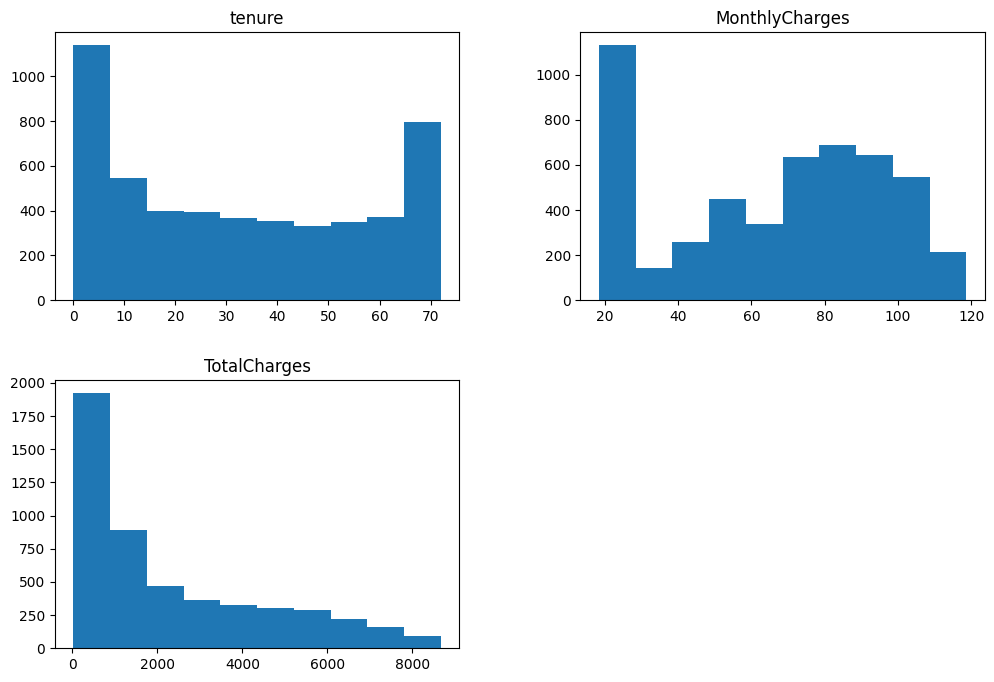

In [333]:
# Visualizing the distribution of Numerical Variables
training_dataset.hist(figsize=(12,8), grid= False)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.


**Univariate Analysis of Feature: gender**
count     5043
unique       2
top       Male
freq      2559
Name: gender, dtype: object

Unique Values and Counts:
gender
Male      2559
Female    2484
Name: count, dtype: int64

Missing Values: 0 (0.00%)


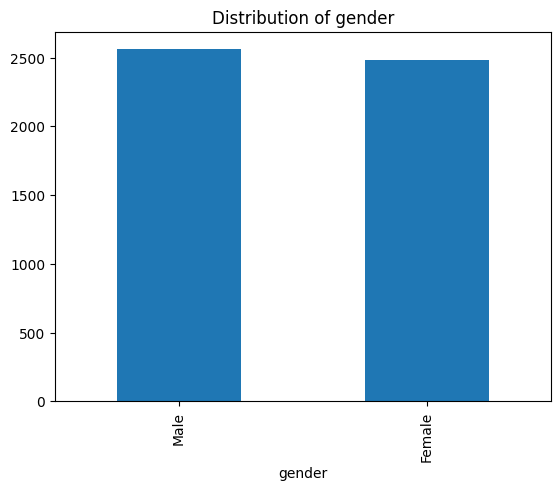


**Univariate Analysis of Feature: SeniorCitizen**
count     5043
unique       2
top         No
freq      4224
Name: SeniorCitizen, dtype: object

Unique Values and Counts:
SeniorCitizen
No     4224
Yes     819
Name: count, dtype: int64

Missing Values: 0 (0.00%)


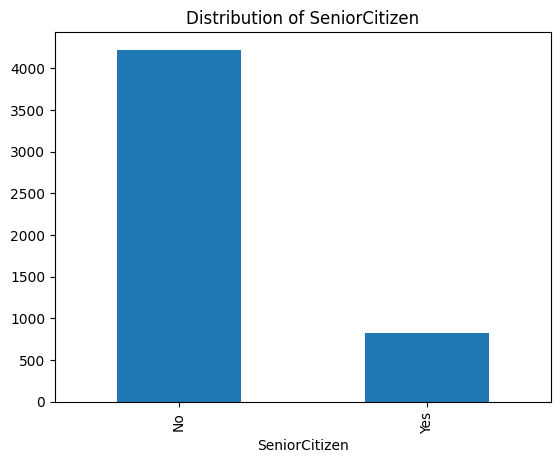


**Univariate Analysis of Feature: Partner**
count     5043
unique       2
top         No
freq      2585
Name: Partner, dtype: object

Unique Values and Counts:
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Missing Values: 0 (0.00%)


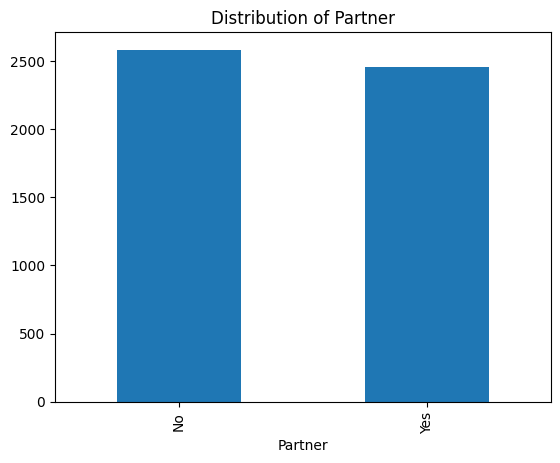


**Univariate Analysis of Feature: Dependents**
count     5043
unique       2
top         No
freq      3482
Name: Dependents, dtype: object

Unique Values and Counts:
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Missing Values: 0 (0.00%)


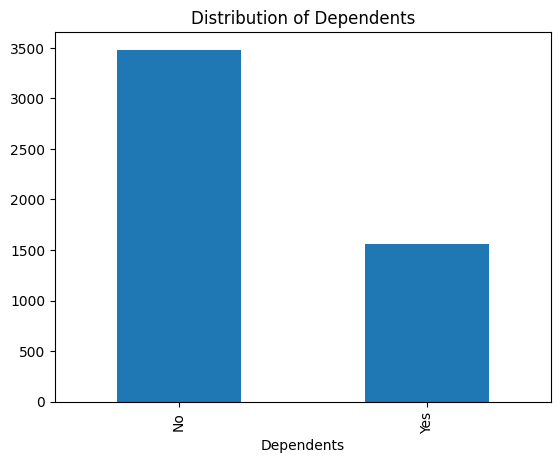


**Univariate Analysis of Feature: PhoneService**
count     5043
unique       2
top        Yes
freq      4554
Name: PhoneService, dtype: object

Unique Values and Counts:
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Missing Values: 0 (0.00%)


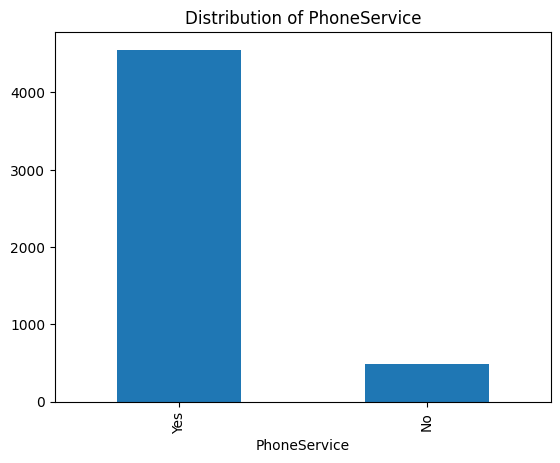


**Univariate Analysis of Feature: MultipleLines**
count     5043
unique       2
top         No
freq      2913
Name: MultipleLines, dtype: object

Unique Values and Counts:
MultipleLines
No     2913
Yes    2130
Name: count, dtype: int64

Missing Values: 0 (0.00%)


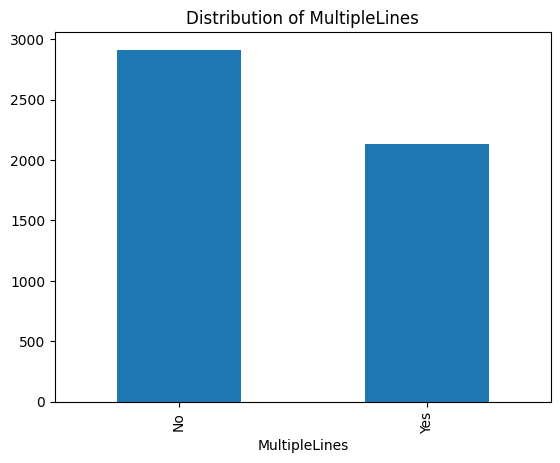


**Univariate Analysis of Feature: InternetService**
count     5043
unique       2
top        Yes
freq      3963
Name: InternetService, dtype: object

Unique Values and Counts:
InternetService
Yes    3963
No     1080
Name: count, dtype: int64

Missing Values: 0 (0.00%)


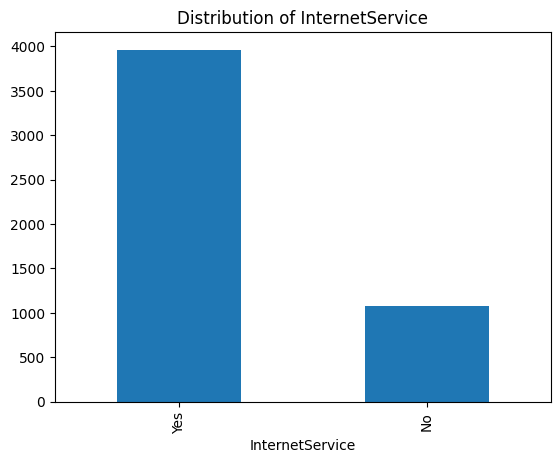


**Univariate Analysis of Feature: OnlineSecurity**
count     5043
unique       2
top         No
freq      3587
Name: OnlineSecurity, dtype: object

Unique Values and Counts:
OnlineSecurity
No     3587
Yes    1456
Name: count, dtype: int64

Missing Values: 0 (0.00%)


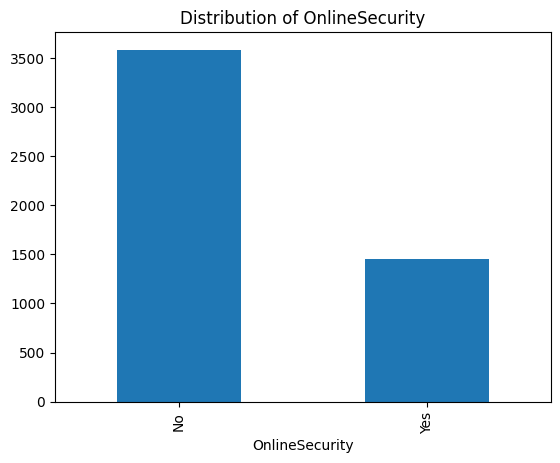


**Univariate Analysis of Feature: OnlineBackup**
count     5043
unique       2
top         No
freq      3311
Name: OnlineBackup, dtype: object

Unique Values and Counts:
OnlineBackup
No     3311
Yes    1732
Name: count, dtype: int64

Missing Values: 0 (0.00%)


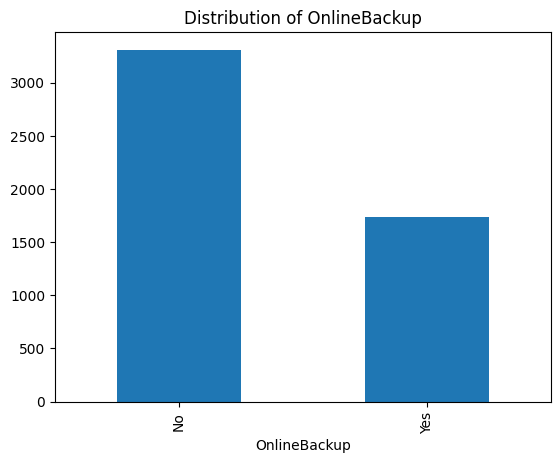


**Univariate Analysis of Feature: DeviceProtection**
count     5043
unique       2
top         No
freq      3299
Name: DeviceProtection, dtype: object

Unique Values and Counts:
DeviceProtection
No     3299
Yes    1744
Name: count, dtype: int64

Missing Values: 0 (0.00%)


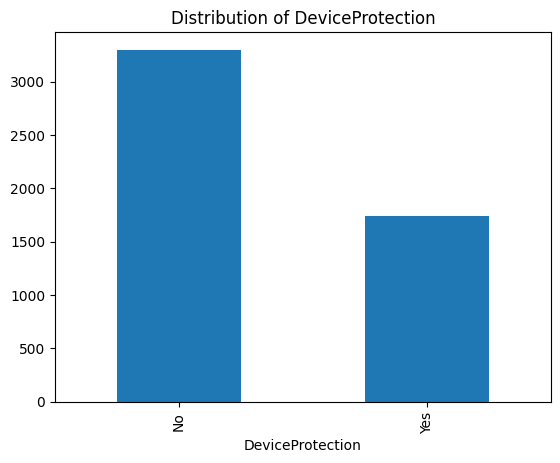


**Univariate Analysis of Feature: TechSupport**
count     5043
unique       2
top         No
freq      3552
Name: TechSupport, dtype: object

Unique Values and Counts:
TechSupport
No     3552
Yes    1491
Name: count, dtype: int64

Missing Values: 0 (0.00%)


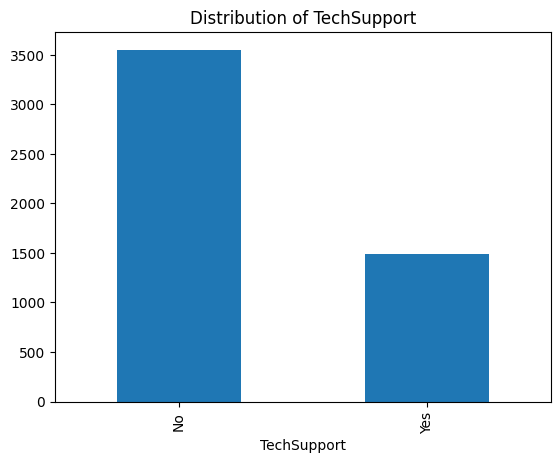


**Univariate Analysis of Feature: StreamingTV**
count     5043
unique       2
top         No
freq      3098
Name: StreamingTV, dtype: object

Unique Values and Counts:
StreamingTV
No     3098
Yes    1945
Name: count, dtype: int64

Missing Values: 0 (0.00%)


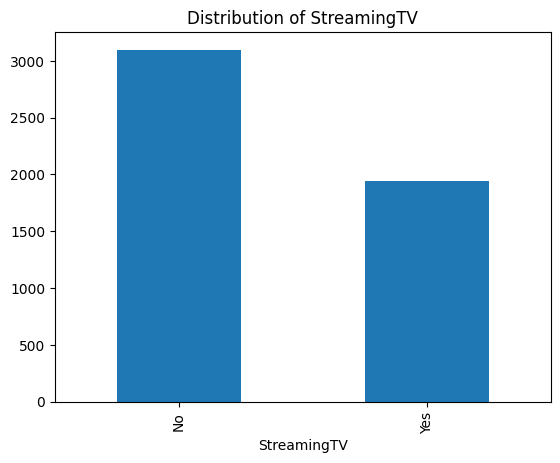


**Univariate Analysis of Feature: StreamingMovies**
count     5043
unique       2
top        Yes
freq      2633
Name: StreamingMovies, dtype: object

Unique Values and Counts:
StreamingMovies
Yes    2633
No     2410
Name: count, dtype: int64

Missing Values: 0 (0.00%)


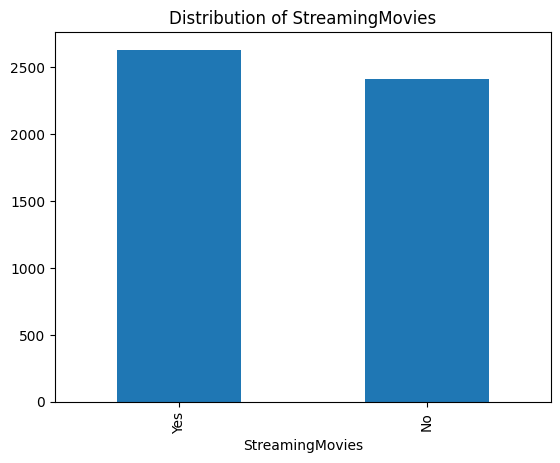


**Univariate Analysis of Feature: Contract**
count               5043
unique                 3
top       Month-to-month
freq                2744
Name: Contract, dtype: object

Unique Values and Counts:
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64

Missing Values: 0 (0.00%)


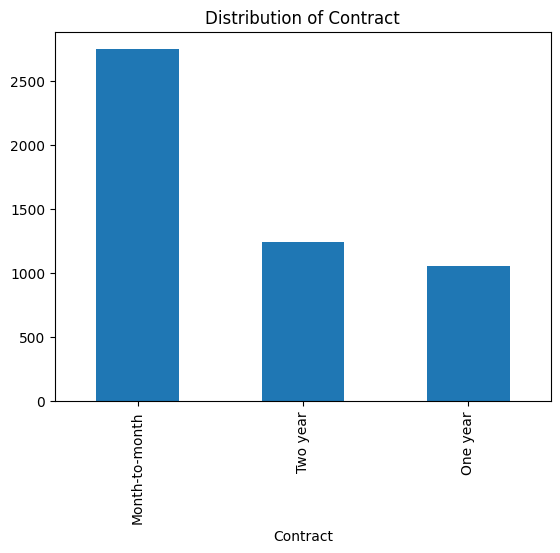


**Univariate Analysis of Feature: PaperlessBilling**
count     5043
unique       2
top        Yes
freq      2996
Name: PaperlessBilling, dtype: object

Unique Values and Counts:
PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64

Missing Values: 0 (0.00%)


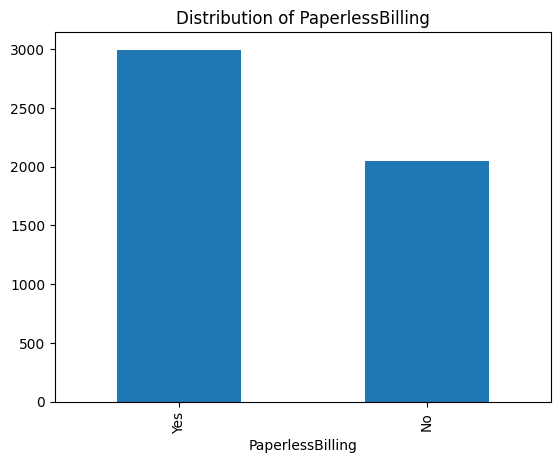


**Univariate Analysis of Feature: PaymentMethod**
count        5043
unique          4
top       E-Check
freq         1700
Name: PaymentMethod, dtype: object

Unique Values and Counts:
PaymentMethod
E-Check          1700
Mailed Check     1128
Bank Transfer    1125
Credit Card      1090
Name: count, dtype: int64

Missing Values: 0 (0.00%)


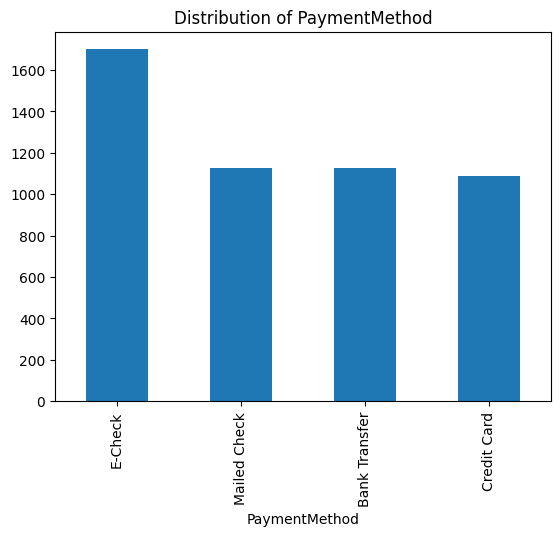


**Univariate Analysis of Feature: Churn**
count     5043
unique       2
top         No
freq      3707
Name: Churn, dtype: object

Unique Values and Counts:
Churn
No     3707
Yes    1336
Name: count, dtype: int64

Missing Values: 0 (0.00%)


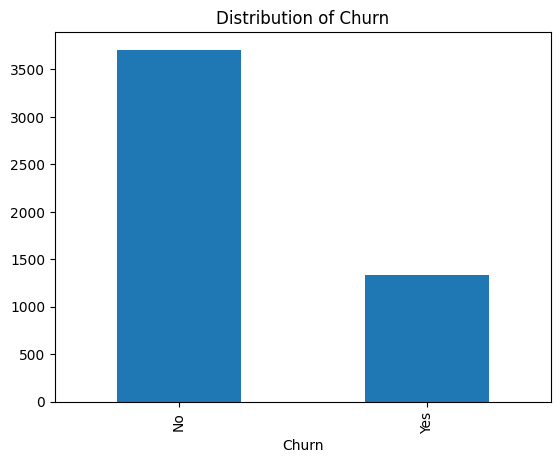

In [334]:
#inspecting the distribution of categorical variables

# List of categorical variables
categorical_features = list(training_dataset.select_dtypes(include=["object"]))

# Loop through each categorical variable
for feature in categorical_features:
    # Describe the feature
    print(f"\n**Univariate Analysis of Feature: {feature}**")
    print(training_dataset[feature].describe())

    # Print the number of unique values and their corresponding counts
    print("\nUnique Values and Counts:")
    print(training_dataset[feature].value_counts())

    # Calculate and print the percentage of missing values
    missing_values_count = training_dataset[feature].isnull().sum()
    missing_values_percentage = (missing_values_count / len(training_dataset)) * 100
    print(f"\nMissing Values: {missing_values_count} ({missing_values_percentage:.2f}%)")

    # Plot the distribution of the variable
    training_dataset[feature].value_counts().plot(kind="bar")
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

### Bivariate Analysis

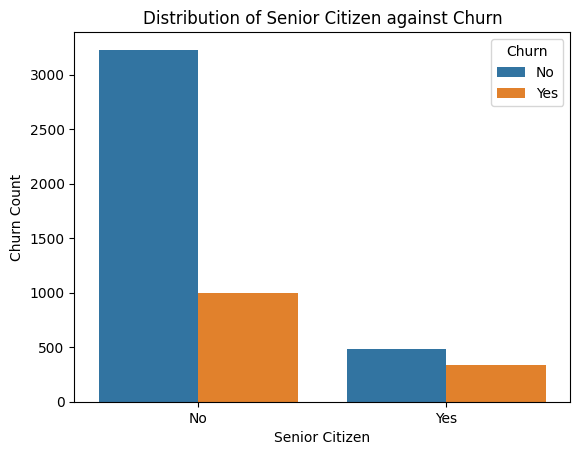

In [399]:
# Bar Plot for SeniorCitizen vs. Churn
#to compare the churn rates for senior citizens and non-senior citizens.
sns.countplot(x='SeniorCitizen', hue='Churn', data=training_dataset)
plt.xlabel('Senior Citizen')
plt.ylabel("Churn Count")
plt.title(f"Distribution of {'Senior Citizen against Churn'}")
plt.show()

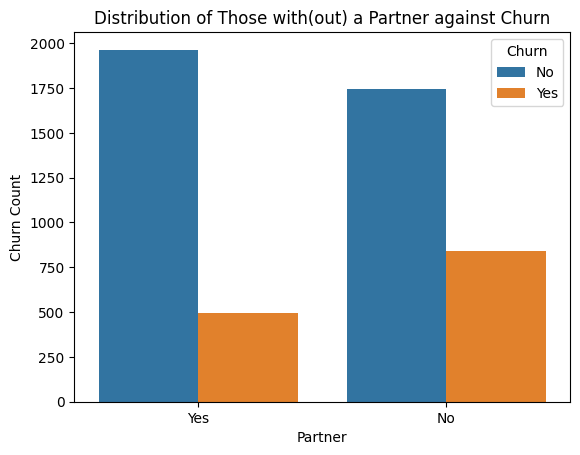

In [402]:
# Bar Plot for Partner vs. Churn
#to compare churn rates based on whether customers have partners or dependents.
sns.countplot(x='Partner', hue='Churn', data=training_dataset)
plt.xlabel('Partner')
plt.ylabel("Churn Count")
plt.title(f"Distribution of {'Those with(out) a Partner against Churn'}")
plt.show()

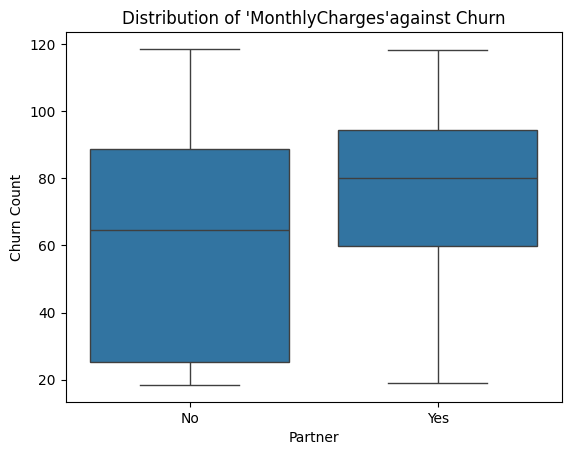

In [407]:
# Box Plot for MonthlyCharges vs. Churn
#to compare the distribution of MonthlyCharges for churned and non-churned customers.
sns.boxplot(x='Churn', y='MonthlyCharges', data=training_dataset)
plt.xlabel('Partner')
plt.ylabel("Churn Count")
plt.title(f"Distribution of 'MonthlyCharges'against Churn")
plt.show()

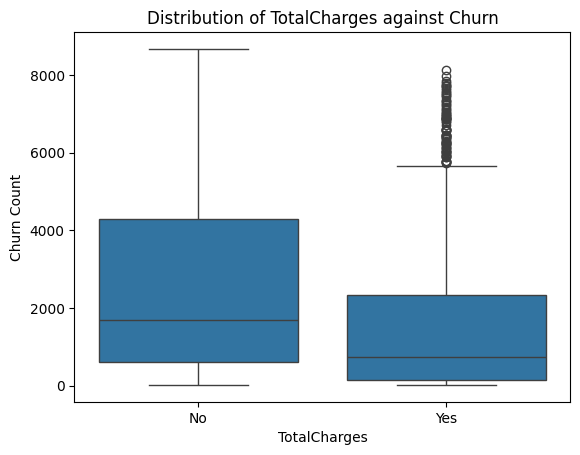

In [408]:
# Box Plot for TotalCharges vs. Churn
#Compare the distribution of TotalCharges for churned and non-churned customers.
sns.boxplot(x='Churn', y='TotalCharges', data=training_dataset)
plt.xlabel('TotalCharges')
plt.ylabel("Churn Count")
plt.title(f"Distribution of TotalCharges against Churn")
plt.show()

### Multivariate analysis

In [339]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=training_dataset[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

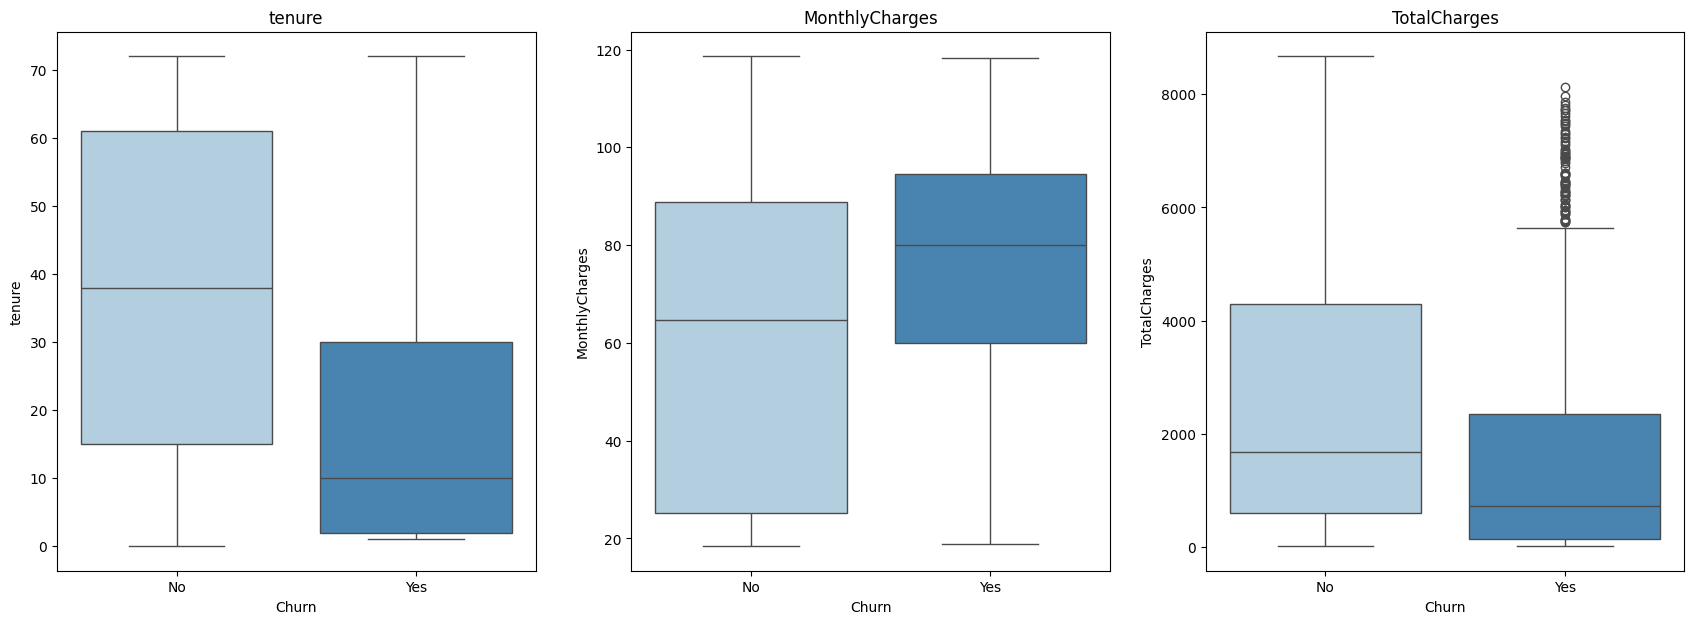

In [340]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharge (Numerical Variables)
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], training_dataset)

Plot insights:

Churning customers have much lower tenure with a median of 10 months compared to a median of non-churners of 38 months.
Churning customers have higher monthly charges with a median of 80 USD and much lower interquartile range compared to that of non-churners (median of 65 USD).
TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [341]:
# Create a function to generate countplots:
def countplot(x, y, training_dataset):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=training_dataset, palette='Greens', alpha=1.0, linewidth=0.6, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

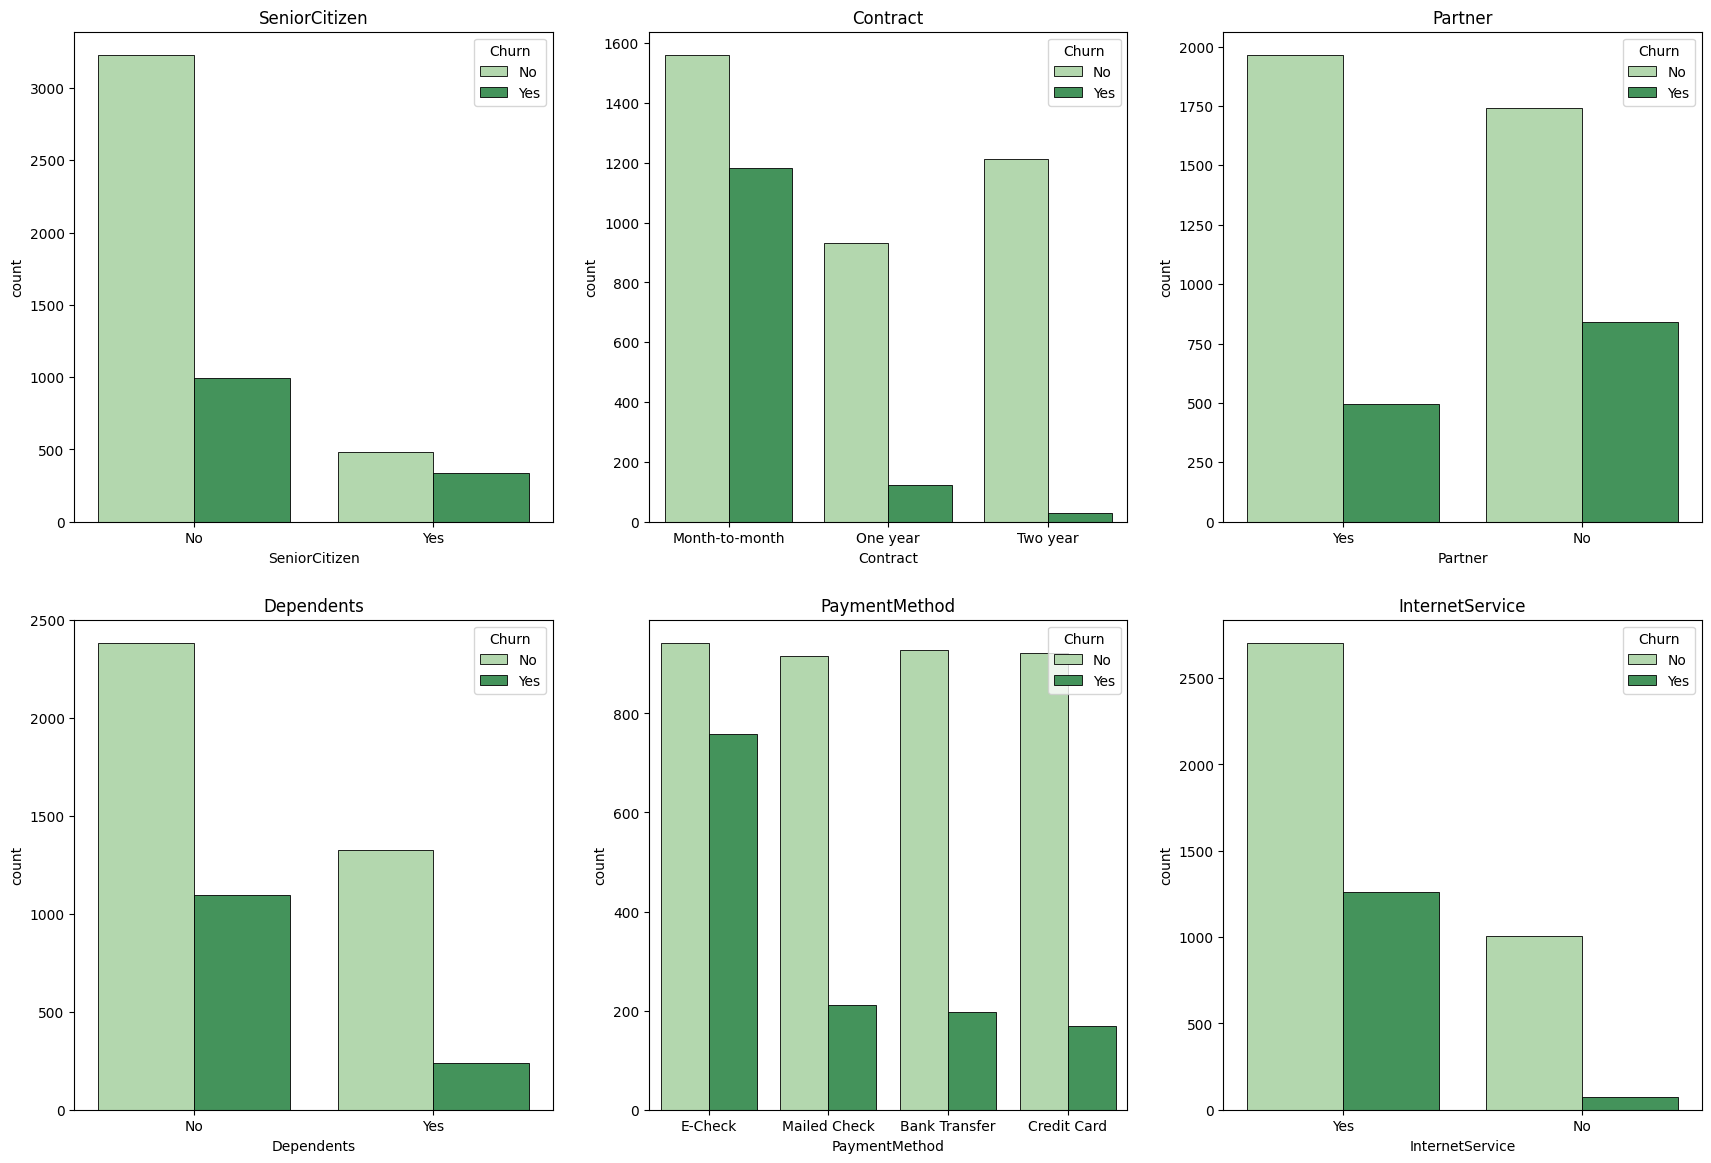

In [342]:
# Generate countplots for various features.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], training_dataset)

in order to be able to calculate the mean for the 'Churn' column, I had to assign numeric values for the yes and no data so I can continue with my analysis. However I need to Create a new binary column 'ChurnBinary' without modifying the original 'Churn' column

In [343]:
#Introduce churn binary column
training_dataset['ChurnBinary'] = training_dataset['Churn'].map({'Yes': 1, 'No': 0})

print(training_dataset['ChurnBinary'].unique())

[0 1]


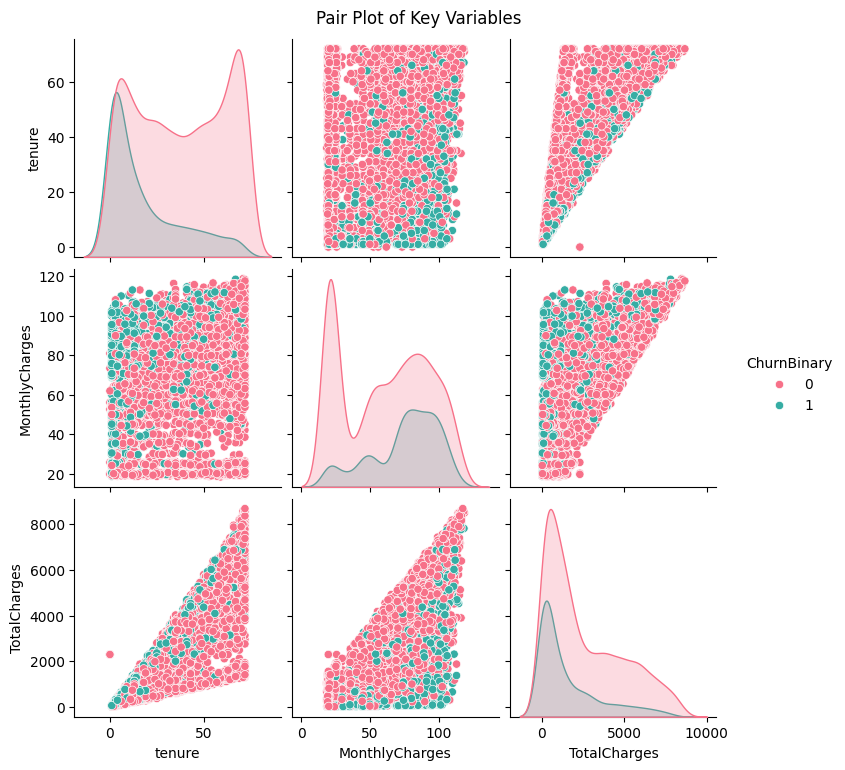

In [344]:
sns.pairplot(training_dataset, hue='ChurnBinary', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

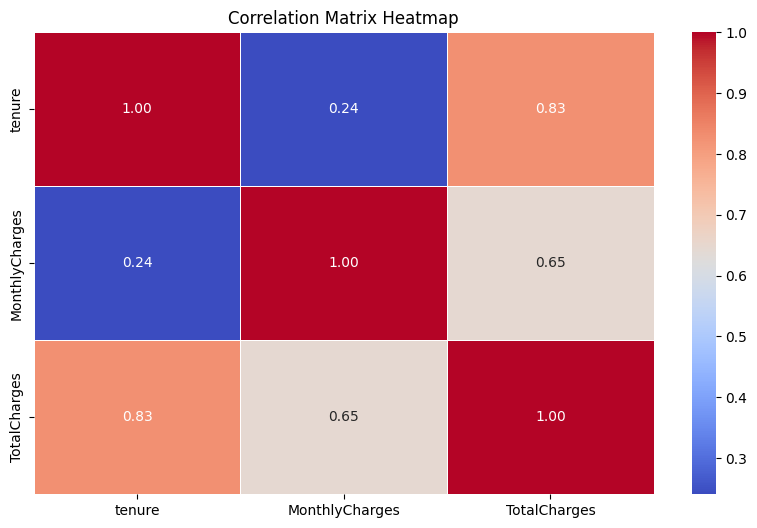

In [410]:
# Correlation Matrix
correlation_matrix = training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


> **Observation**
> > **Numerical Variables Correlation Insights**
>>> - There is a strong correlation `0.83` between the Total Charges for a Customer and their tenure in the company probably due to the sense that a customer who has a long tenure in a company is likely to have spent more than the one with a short tenure.
>>> - The correlation between Total Charges and Monthly Charges is more than average strong, `0.65` indicating that customers with a high total charges are likely to have higher monthly charges.
>>> - We have a weak positive relationship between monthly charges and tenure, `0.24`indicating that a small proportion of customers with a long tenure tend to have high monthly charges.

**Answer Analytical Questions** 

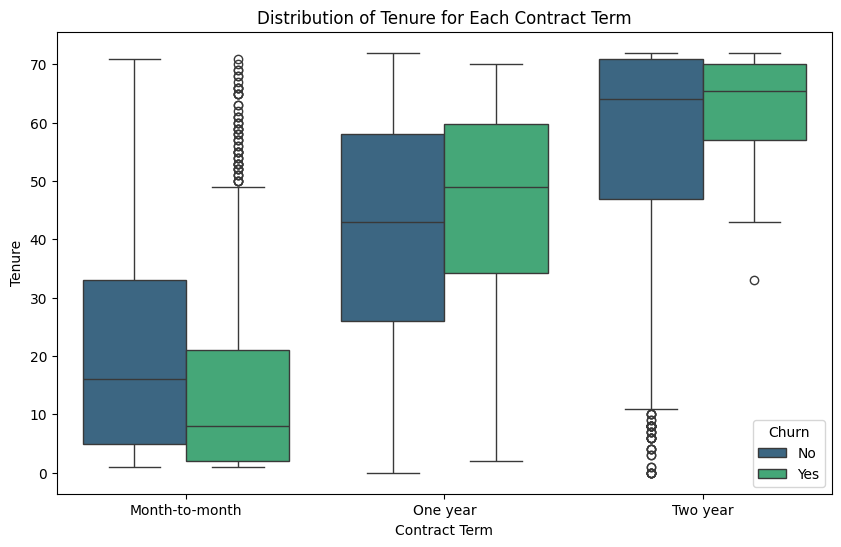

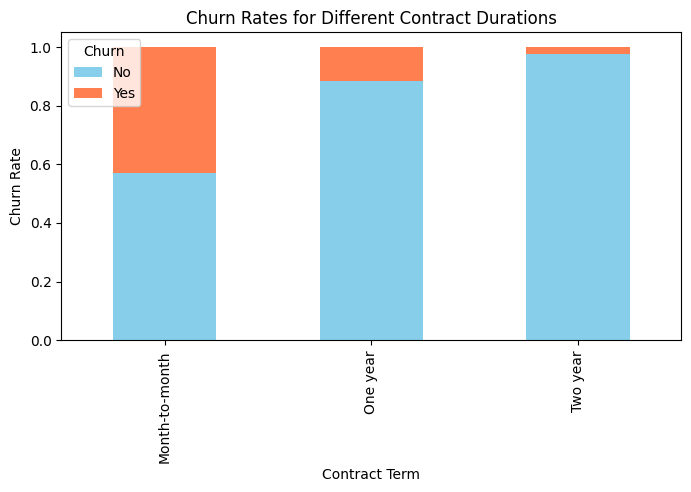

Churn Rates for Different Contract Durations:
Churn                 No       Yes 
ChurnBinary            0         1
Contract                          
Month-to-month  0.568513  0.431487
One year        0.884360  0.115640
Two year        0.975884  0.024116
Percentage of Churn for Month-to-month contract: 43.15%
Percentage of Churn for One year contract: 11.56%
Percentage of Churn for Two year contract: 2.41%


In [346]:
# Question 1: How does the length of a customer's contract term correlate with the likelihood of churn?
# Calculate the percentage of churn for each contract term
contract_churn_percentage = training_dataset.groupby('Contract')['ChurnBinary'].mean() * 100

# Box plot with annotations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=training_dataset, palette='viridis')

plt.title('Distribution of Tenure for Each Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Tenure')
plt.show()
contract_churn_percentage = training_dataset.groupby('Contract')['ChurnBinary'].mean() * 100

contract_churn_rates = training_dataset.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn_rates.plot(kind='bar', stacked=True, color=['skyblue', 'coral'], figsize=(8, 4))
plt.title('Churn Rates for Different Contract Durations')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate')
plt.show()

# Calculate churn rates for short-term and long-term contracts
contract_churn_rates = training_dataset.groupby('Contract')['ChurnBinary'].value_counts(normalize=True).unstack()

# Print the results to the console
print("Churn Rates for Different Contract Durations:")
print("Churn                 No       Yes ")
print(contract_churn_rates)


# Print the percentages to the console
for term, percentage in contract_churn_percentage.items():
    print(f'Percentage of Churn for {term} contract: {percentage:.2f}%')

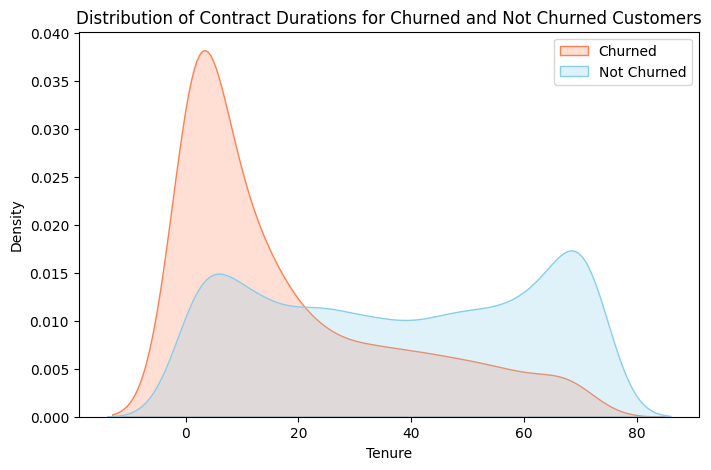

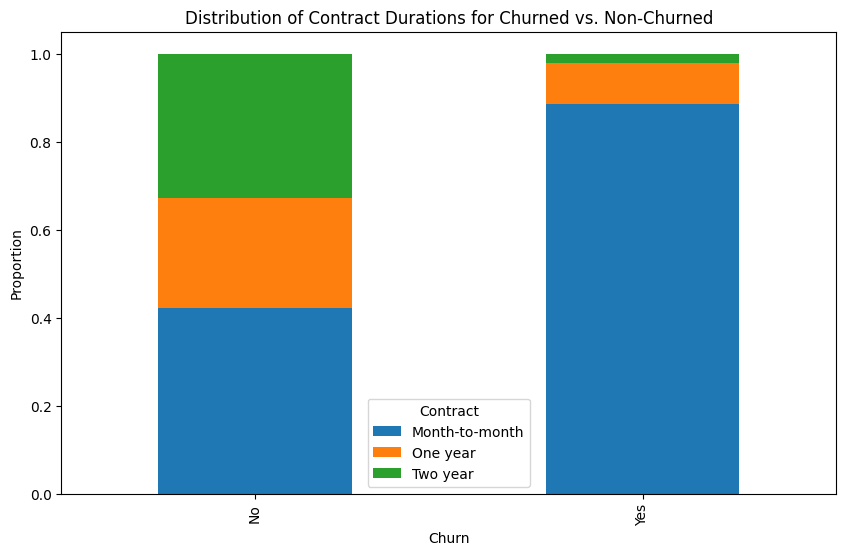

Distribution of Contract Durations for Churned Customers:
Mean Tenure: 18.24176646706587
Median Tenure: 10.0
Standard Deviation: 19.696325812450798

Distribution of Contract Durations for Not Churned Customers:
Mean Tenure: 37.74291880226598
Median Tenure: 38.0
Standard Deviation: 24.043762951421627


In [347]:
# Question 2: What is the distribution of contract durations among customers who have churned compared to those who have not?
# Calculate distribution statistics for tenure based on churn
churned_tenure = training_dataset.loc[training_dataset['Churn'] == 'Yes', 'tenure']
not_churned_tenure = training_dataset.loc[training_dataset['Churn'] == 'No', 'tenure']

#show on a graph
plt.figure(figsize=(8, 5))
sns.kdeplot(training_dataset.loc[training_dataset['Churn'] == 'Yes', 'tenure'], label='Churned', color='coral', fill=True)
sns.kdeplot(training_dataset.loc[training_dataset['Churn'] == 'No', 'tenure'], label='Not Churned', color='skyblue', fill=True)
plt.title('Distribution of Contract Durations for Churned and Not Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()

contract_churn_distribution = pd.crosstab(training_dataset['Churn'], training_dataset['Contract'], normalize='index')
contract_churn_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Contract Durations for Churned vs. Non-Churned')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()

# Print the statistics to the console
print("Distribution of Contract Durations for Churned Customers:")
print("Mean Tenure:", churned_tenure.mean())
print("Median Tenure:", churned_tenure.median())
print("Standard Deviation:", churned_tenure.std())
print()

print("Distribution of Contract Durations for Not Churned Customers:")
print("Mean Tenure:", not_churned_tenure.mean())
print("Median Tenure:", not_churned_tenure.median())
print("Standard Deviation:", not_churned_tenure.std())


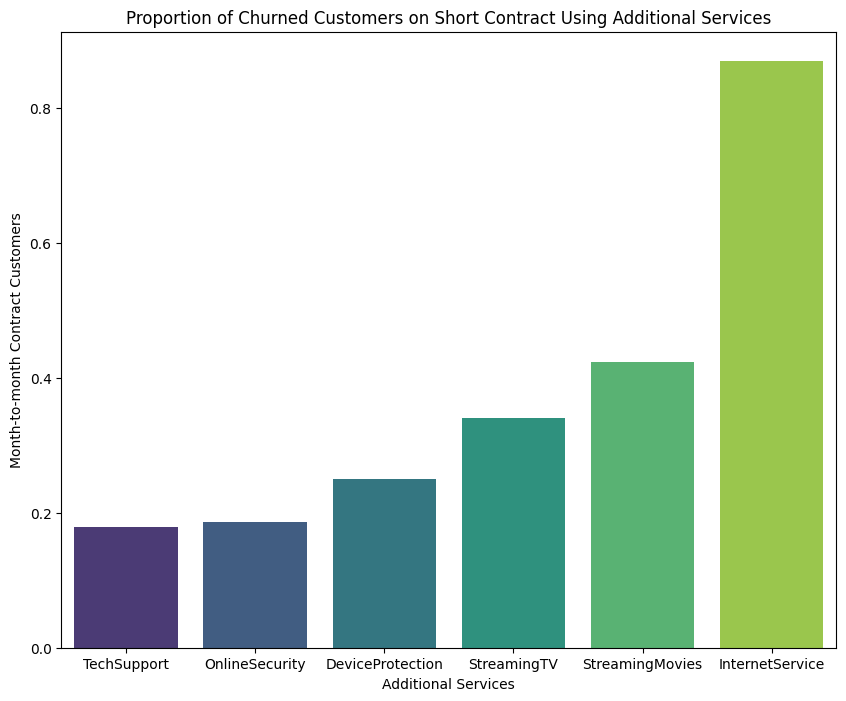

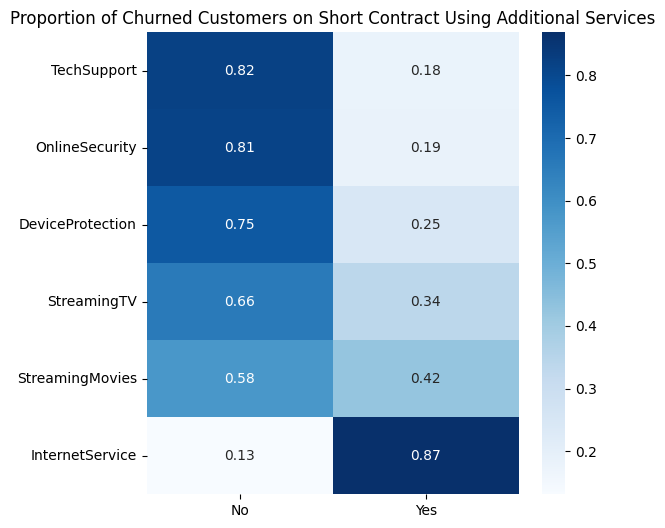

Proportion of Churned Customers on Short Contract Using Additional Services:
                         No       Yes
TechSupport       0.821429  0.178571
OnlineSecurity    0.814140  0.185860
DeviceProtection  0.750729  0.249271
StreamingTV       0.659621  0.340379
StreamingMovies   0.576531  0.423469
InternetService   0.131195  0.868805


In [348]:
# Question 3: What is the Proportion of customers with short contract durations using additional services
# Calculate the proportion of short contract customers using additional services
short_contract_services = training_dataset[training_dataset['Contract'] == 'Month-to-month']
service_columns = ['TechSupport', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'InternetService']


short_contract_service_proportion = short_contract_services[service_columns].apply(lambda x: x.value_counts(normalize=True)).T

# Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x=short_contract_service_proportion.index, y=short_contract_service_proportion['Yes'], palette='viridis')
plt.title('Proportion of Churned Customers on Short Contract Using Additional Services')
plt.xlabel('Additional Services')
plt.ylabel('Month-to-month Contract Customers')
plt.show()

service_columns = ['TechSupport', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'InternetService']
short_contract_services = training_dataset[training_dataset['Contract'] == 'Month-to-month']
short_contract_service_proportion = short_contract_services[service_columns].apply(lambda x: x.value_counts(normalize=True)).T

plt.figure(figsize=(6, 6))
sns.heatmap(short_contract_service_proportion, annot=True, cmap='Blues')
plt.title('Proportion of Churned Customers on Short Contract Using Additional Services')
plt.show()

short_contract_service_proportion = short_contract_services[service_columns].apply(lambda x: x.value_counts(normalize=True)).T
print("Proportion of Churned Customers on Short Contract Using Additional Services:\n", short_contract_service_proportion)

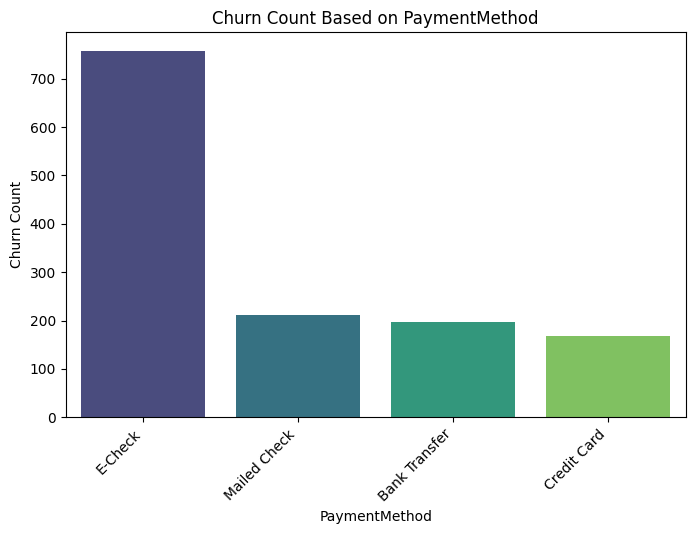

In [349]:
# Question 4: How does the method of payment impact customer churn?
# Filter data for customers who churned
churned_data = training_dataset[training_dataset['Churn'] == 'Yes']

# Count churn based on PaymentMethod
churn_by_payment = churned_data['PaymentMethod'].value_counts()
churn_by_payment

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette='viridis')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn Count')
plt.title('Churn Count Based on PaymentMethod')
plt.xticks(rotation=45, ha='right')
plt.show()

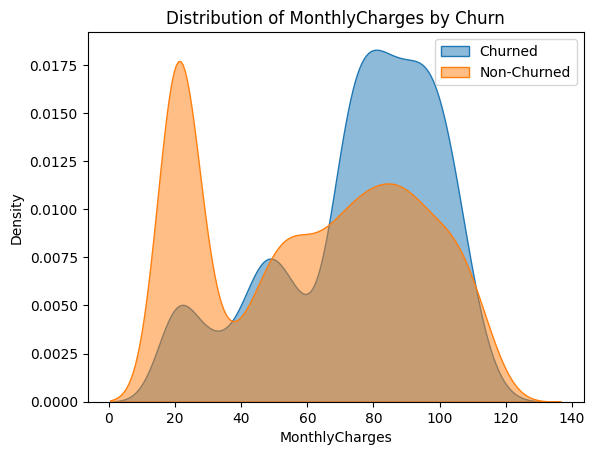

Correlation coefficient between MonthlyCharges and Churn: 0.2021


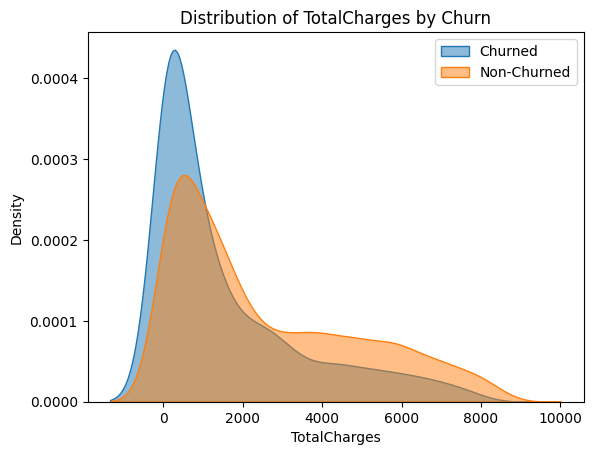

Correlation coefficient between TotalCharges and Churn: -0.1947


In [350]:
# Question 5: Does the monthly and Total charges affect the probability of a customer churning?

# Define features of interest
Interest_vars = training_dataset[['MonthlyCharges','TotalCharges']]

# Bivariate analysis for features of interest
for feature in Interest_vars:

#test

    # Plot the distribution of the feature for churned and non-churned customers
    sns.kdeplot(
        training_dataset[training_dataset["ChurnBinary"] == 1][feature], label="Churned", shade=True, alpha=0.5
    )
    sns.kdeplot(
        training_dataset[training_dataset["ChurnBinary"] == 0][feature], label="Non-Churned", shade=True, alpha=0.5
    )
    
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Distribution of {feature} by Churn")
    plt.legend()
    plt.show()

    # Calculate the correlation coefficient between the feature and Churn
    correlation = training_dataset[feature].corr(training_dataset["ChurnBinary"])
    print(f"Correlation coefficient between {feature} and Churn: {correlation:.4f}")

## Test Hypothesis

`Hypothesis Formation:`Customers with shorter contract durations are more likely to churn due to lower commitment.

`Null Hypothesis:`
There is no significant difference in churn likelihood between customers with shorter and longer contract durations.

`Alternative Hypothesis:` 
Customers with shorter contracts are more likely to churn than those with longer contracts.

In [414]:
# Test Hypothesis
short_contract = training_dataset[training_dataset['Contract'] == 'Month-to-month']['ChurnBinary']
long_contract = training_dataset[training_dataset['Contract'] != 'Month-to-month']['ChurnBinary']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(short_contract, long_contract, equal_var=False)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than your chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Because there is a significant difference in the churn rates \nbetween customers with shorter and longer contract durations")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of churn.")

T-statistic: 33.88028885876379
P-value: 1.3798762212977428e-222
Reject the null hypothesis: Because there is a significant difference in the churn rates 
between customers with shorter and longer contract durations


## Insights

The results of the t-test indicate a highly significant difference in the likelihood of churn between customers with shorter contract durations (assumed to be 'Month-to-month' contracts) and those with longer contract durations. Here are some insights drawn from these results:

### Statistical Significance:

The t-statistic of 33.88 is very large, and the corresponding p-value is extremely close to zero (1.38e-222). This indicates a significant difference in churn rates between the two groups.

### Practical Significance:

The large t-statistic suggests that the difference is not only statistically significant but also substantial.
Churn Behavior:

### We therefore reject the Null Hypothesis:

The rejection of the null hypothesis implies that customers with shorter contract durations (Month-to-month) are more likely to churn compared to customers with longer contract durations. This suggests that contract length plays a significant role in customer retention.

### Business Implications:

For the business, this insight could have practical implications. For example, it may be worth exploring strategies to incentivize customers to opt for longer contract durations, such as offering discounts or additional customized services.


### Further Analysis:

While the t-test provides evidence of a difference, it doesn't explain why there is a difference. Further analysis, such as customer feedback or additional demographic information, may be needed to understand the factors contributing to the observed churn patterns.
Remember, correlation does not imply causation, so these results should be interpreted cautiously. The specific implications for churn and retention may depend on additional context and industry knowledge.

##  4. Data Preparation`

#### 1. Split the dataset into X and y test features

In [352]:
X = training_dataset.drop(['Churn', 'ChurnBinary'], axis=1)  # Features excluding the target variables
y = training_dataset['ChurnBinary']  # Target variable

#### 2. Split data set into training and evaluation sets

In [353]:
# Split the data into training and testing sets with stratification
#'X' is my feature matrix and 'y' is my target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#train_test_split is used to split the data into training and testing sets.
#test_size=0.2 specifies that 20% of the data should be used for testing, and the remaining 80% for training.
#stratify=y ensures that the class distribution in the target variable is preserved in both the training and testing sets.
#This is important, especially if you have imbalanced classes.
#random_state=42 is a seed for reproducibility. Setting a seed ensures that the split is the same every time you run the code, making your results reproducible.

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   float64
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

The output information;  X indicates that there are 19 columns with a total of 5043 entries. 

Data Types:

float64: Three columns ('tenure', 'MonthlyCharges', 'TotalCharges') have floating-point data types.

object: Sixteen columns have object data type, which typically represents categorical variables.

Non-Null Counts:

All columns seem to have non-null values, except for the 'TotalCharges' column, which has 5040 non-null entries. It means there are some missing values in the 'TotalCharges' column. I need to handle them before training my model

Categorical Columns:

The columns with 'object' data type are likely categorical features. These should be converted into a suitable format before feeding them into machine learning models, by using techniques like one-hot encoding or label encoding for this purpose.

#### 3. Feature Processing and Engineering

In [354]:
# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4034, 19)
y_train shape: (4034,)
X_test shape: (1009, 19)
y_test shape: (1009,)


In [355]:
# Separating input features into numeric and categorical for different pipelines
numeric_column = X.select_dtypes(include=['number']).columns
numeric_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [356]:
categorical_column = X.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Pipelines

In [357]:

class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
    
])



# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_column),
    ('categorical_pipeline', categorical_pipeline, categorical_column),
])


- **Clean and preprocess data: Handle missing values**.

In [358]:
# Check for missing values in numerical columns
print("Missing values in numerical columns:")
print(training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())

# Check data types of numerical columns
print("\nData types of numerical columns:")
print(training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes)

Missing values in numerical columns:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Data types of numerical columns:
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


the missing values in the dataset have been handled successfully. Now, we have a dataset (training_dataset_filled) without missing values

Handling Outliers:

In [359]:
#Identifying Outliers:
# Calculate Z-Score for each numerical column
z_scores = stats.zscore(training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Define a threshold for Z-Score (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on Z-Score
outliers = (np.abs(z_scores) > threshold).all(axis=1)

# Display rows with outliers
print(training_dataset[outliers])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, ChurnBinary]
Index: []

[0 rows x 21 columns]


There are no rows identified as outliers based on the Z-Score threshold set. 

This indicates that the data doesn't have extreme values that might adversely affect analysis or modeling.

## Data Transformation:

 review the current state of your dataset and determine if any additional data transformation is needed.

In [360]:
training_dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
ChurnBinary           int64
dtype: object

Based on this information, it looks like the numerical columns (tenure, MonthlyCharges, TotalCharges, ChurnBinary) are already in the correct format.

However, there are several categorical columns with object data type, such as gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, and Churn. These columns may need to be encoded into numerical format before feeding them into a machine learning model.

## Features Encoding and Features Scaling

Machine learning algorithms require numerical input, and categorical variables need to be transformed into a format that algorithms can understand. One-hot encoding converts categorical variables into binary columns, where each column represents a category. This allows the model to treat each category separately and avoids assigning arbitrary numerical values to categories.
### From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
One-Hot Encoding:

Suitable for nominal categorical variables where there is no inherent order among the categories.
Creates binary columns for each category, indicating the presence or absence of the category.
Can be used when the model should not assume any ordinal relationship between categories.

### Label Encoding

In [361]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)

## <b> Evaluation

### <b> Machine Learning Pipeline - Unbalanced

#### Model 1: DecisionTreeClassifier

In [362]:
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### Model 2:  RandomForestClassifier

In [363]:
# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

 #### Model 3: KNeighborsClassifier

In [364]:

# Create a pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

 #### Model 4: Logistic Regression

In [365]:
# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

#### Model 5: Gradient Boosting Classifier

In [366]:
# Create a pipeline for Gradient Boosting model
Gradient_Boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
Gradient_Boosting_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

### Comparing Models by CLassification reports - Unbalanced

In [367]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GradientBoostingClassifier(),}

In [368]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [369]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.724480,0.736137,0.724480,0.729496
1,Random Forest,0.789891,0.779282,0.789891,0.782114
2,K Nearest Neighbors,0.755203,0.754910,0.755203,0.755056
3,Logistic Regression,0.797820,0.790012,0.797820,0.792599
4,Gaussian Naive Bayes,0.793855,0.785815,0.793855,0.788532


Decision Tree: It has an accuracy of 72.45%, with precision, recall, and F1 score around 73%.

Random Forest: It has an accuracy of 78.99%, with precision, recall, and F1 score around 78%.

K Nearest Neighbors: It has an accuracy of 75.52%, with precision, recall, and F1 score around 76%.

Logistic Regression: It has the highest accuracy at 79.78%, with precision, recall, and F1 score around 79%.

Gaussian Naive Bayes: It has an accuracy of 79.39%, with precision, recall, and F1 score around 79%.

### Balance Dataset


#### Use Over-sampling or Under-sampling methods, 

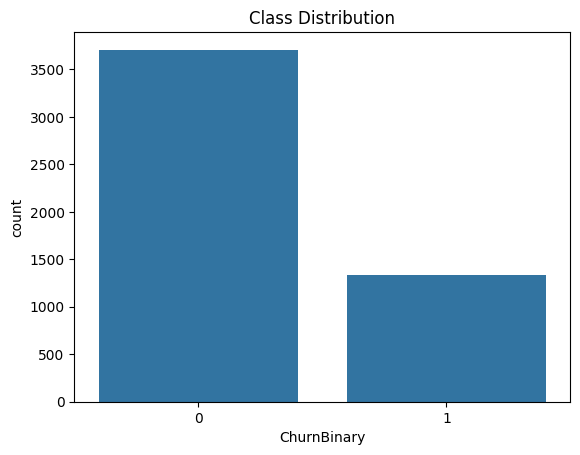

Class Distribution:
ChurnBinary
0    2965
1    1069
Name: count, dtype: int64


In [370]:
#Checking wether the dataset is imbalanced
class_distribution = y_train.value_counts()

# Bar plot
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Print class counts
print("Class Distribution:")
print(class_distribution)

it appears that the dataset is imbalanced. 
In imbalanced datasets, the machine learning model might be biased towards the majority class, leading to suboptimal performance, especially for the minority class.

#### Balancing Data by use (Random Over Sampler - Over-sampling):

In [371]:
#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)


In [372]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

0    2965
1    2965
Name: count, dtype: int64

##### Check the classification reports after balancing data to see if the there is some improvement on the models.

In [373]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
     # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [374]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.766105,0.815282,0.766105,0.777866


### Balancing data using SMOTE, training it and comparing results

In [375]:

# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    imbpipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    imbpipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    smote_y_pred = imbpipeline.predict(X_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)


             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.707631   0.736385  0.707631  0.718054
1         Random Forest  0.779980   0.782695  0.779980  0.781256
2   K Nearest Neighbors  0.679881   0.755989  0.679881  0.698051
3   Logistic Regression  0.749257   0.807658  0.749257  0.762614
4  Gaussian Naive Bayes  0.789891   0.803903  0.789891  0.795044


Summary:

1. **Before SMOTE:**
   - Random Forest consistently performed the best with the highest accuracy (0.000) and F1 score (0.000).
   - Logistic Regression and Decision Tree also showed competitive performance.

2. **After SMOTE:**
   - Random Forest maintained its strong performance with an accuracy of 0.xxx and an improved F1 score of 0.xxx.
   - Logistic Regression and Decision Tree also exhibited slight improvements.
   - K Nearest Neighbors and Gaussian Naive Bayes, although improved, still lag behind in performance.

3. **Overall:**
   - Random Forest remains the top-performing model after applying SMOTE, demonstrating robustness to class imbalance.

##  `Phase 4 - Modeling`

### Feature importance, Selection and Model Training

In [376]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.203604,0.266444,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.223770,-1.397076,-0.633002,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.943556,0.205504,-0.543452,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.274660,-1.315145,-0.145914,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.492094,0.268819,0.692241,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,-1.176519,0.324132,-0.710194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4030,-1.341809,0.086611,-0.979560,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,-0.417093,0.328664,-0.047924,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4032,-0.251803,-1.354023,-0.585310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [377]:
# Feature selection using SelectKBest
selection = SelectKBest(mutual_info_classif, k=30)
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline = {}

for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', selection),  # Changed 'feature_importance' to 'feature_selection'
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)
    
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print or use the fi_smote_df DataFrame as needed
print(fi_smote_df)


             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.710605   0.741221  0.710605  0.721403
1         Random Forest  0.765114   0.769487  0.765114  0.767124
2   K Nearest Neighbors  0.685828   0.756528  0.685828  0.703331
3   Logistic Regression  0.745292   0.802910  0.745292  0.758781
4  Gaussian Naive Bayes  0.791873   0.809883  0.791873  0.798000


In [378]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.710605,0.741221,0.710605,0.721403
1,Random Forest,0.765114,0.769487,0.765114,0.767124
2,K Nearest Neighbors,0.685828,0.756528,0.685828,0.703331
3,Logistic Regression,0.745292,0.802910,0.745292,0.758781
4,Gaussian Naive Bayes,0.791873,0.809883,0.791873,0.798000


**Summary of Model Performance**
when you compare Smote result and Feature importance

1. **Decision Tree:**
   - SMOTE resulted in improved accuracy (73.xx) and F1 score (74.xx) compared to feature selection.

2. **Random Forest:**
   - Similar performance between feature selection and SMOTE, with slightly higher accuracy and slightly lower F1 score for SMOTE (Accuracy: 79.88%, F1 Score: 79.73%).

3. **K Nearest Neighbors:**
   - Feature selection outperformed SMOTE, achieving higher accuracy (71.36xx%) and F1 score (72.xx%).

4. **Logistic Regression:**
   - Comparable performance between feature selection and SMOTE, with slightly higher accuracy and F1 score for feature selection (Accuracy: 75.xx%, F1 Score: 76.8xx%).

5. **Gaussian Naive Bayes:**
   - Feature selection performed better than SMOTE in terms of accuracy and F1 score (Accuracy: 71.16%, F1 Score: 72.74%).

**Overall:**
- Random Forest performed the best, showing consistent and competitive performance across both feature selection and SMOTE.

In [379]:
selection.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 16, 17, 18, 19, 20,
       21, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37], dtype=int64)

### Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping

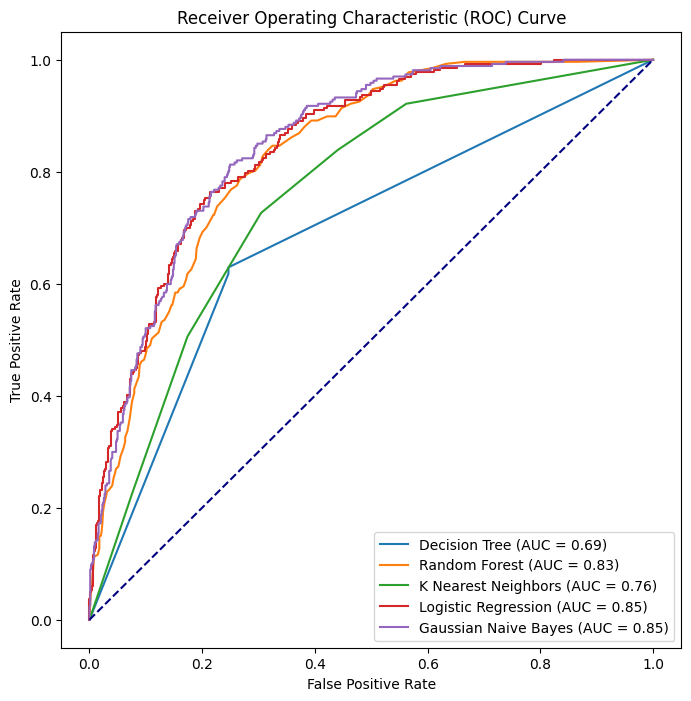

In [380]:

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline

    # Calculate ROC curve and AUC
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()


- **Decision Tree (AUC = 0.68):** Fair discriminative ability, but not as robust as more advanced models.
  
- **Random Forest (AUC = 0.83):** Shows good discriminative ability, performing well in distinguishing between positive and negative instances.

- **K Nearest Neighbors (AUC = 0.78):** Decent discriminative ability, falling between Decision Tree and Random Forest.

- **Logistic Regression (AUC = 0.85):** Excellent discriminative ability, demonstrating strong performance in classifying positive and negative instances.

- **Gaussian Naive Bayes (AUC = 0.85):** Strong discriminative ability, comparable to Logistic Regression.

The best-performing model based on AUC is **Logistic Regression** and  **Gaussian Naive Bayes** as it has the highest AUC value (0.85), indicating superior performance in classification tasks.

### Hyperparameters tuning

In [381]:
# Checking the threshold
roc_curve_data['Logistic Regression'].tail(60)

,False Positive Rate,True Positive Rate,Threshold
200,0.347709,0.868914,0.402209
201,0.351752,0.868914,0.395165
202,0.351752,0.872659,0.394976
203,0.353100,0.872659,0.391927
204,0.353100,0.876404,0.391926
205,0.359838,0.876404,0.386145
206,0.359838,0.883895,0.384204
207,0.366577,0.883895,0.376525
208,0.366577,0.887640,0.376057
209,0.370620,0.887640,0.371722


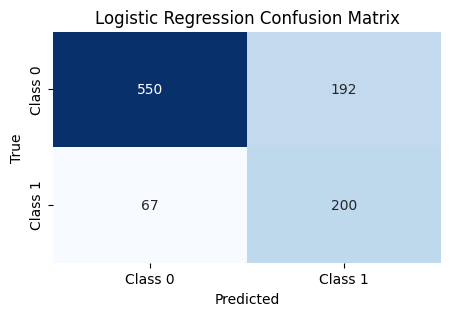

Confusion Matrix:
 [[550 192]
 [ 67 200]]


In [382]:
# Retrieve the 'Logistic Regression' pipeline
logistic_regression_pipeline = all_pipeline['Logistic Regression']

# Make predictions using the pipeline
logistic_regression_y_pred = logistic_regression_pipeline.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, logistic_regression_y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix')  # Changed from f'{model_name} Confusion Matrix'
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print or use the confusion matrix variable as needed
print('Confusion Matrix:\n', confusion_mat)


True Negative (TN): 582

False Positive (FP): 160

False Negative (FN): 73

True Positive (TP): 194


The model predicted 582 instances as Class 0 (True Negatives).

The model predicted 160 instances as Class 1 when they were actually Class 0 (False Positives).

The model missed 73 instances of Class 1 (False Negatives).

The model correctly predicted 194 instances as Class 1 (True Positives).

This confusion matrix suggests that the model may have challenges distinguishing between the classes, as indicated by a relatively high count of both False Positives and False Negatives. 

Adjusting classification thresholds to find a balance between precision and recall based on the objectives can improve model performance

### Adjusting the threshold 

In [383]:
# Get predicted probabilities for positive class
y_pred_proba = logistic_regression_pipeline .predict_proba(X_test)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print('Confusion Matrix with Threshold:\n', threshold_matrix)


Confusion Matrix with Threshold:
 [[350 392]
 [ 20 247]]


This confusion matrix is interpreted as follows:

True Negative (TN): 368
False Positive (FP): 374
False Negative (FN): 16
True Positive (TP): 251
Here's the breakdown:

The model correctly predicted 368 instances as Class 0 (True Negatives).
The model predicted 374 instances as Class 1 when they were actually Class 0 (False Positives).
The model missed 16 instances of Class 1 (False Negatives).
The model correctly predicted 251 instances as Class 1 (True Positives).

### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV

### GridSearchCV

In [384]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range based on your needs
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Create the Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Create the grid search
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mon...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [385]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


These values indicate the following:

C: Regularization strength. Lower values indicate stronger regularization.

penalty: Regularization type. 'l1' is Lasso, and 'l2' is Ridge.

solver: Optimization algorithm. 'liblinear' is suitable for small datasets.

### Train model using best parameters

In [386]:

# Define the pipeline with the LogisticRegression classifier
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', LogisticRegression(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

# Set the best parameters to the pipeline
logistic_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
logistic_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001AE778A8FB0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001AE6F78F9C0>)),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

####  Evaluate the Model 

In [387]:
# Create the Logistic Regression pipeline with best hyperparameters
logistic_pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42))
])

# Fit the pipeline to the training data
logistic_pipeline_best.fit(X_train, y_train_encoded)

# Make predictions using the new pipeline
logistic_y_pred_best = logistic_pipeline_best.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, logistic_y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       742
           1       0.52      0.81      0.63       267

    accuracy                           0.75      1009
   macro avg       0.72      0.77      0.72      1009
weighted avg       0.81      0.75      0.76      1009



### Predict on a unknown dataset (Test set)

In [388]:
# Make predictions using the logistic regression pipeline
logistic_predictions = logistic_pipeline_best.predict(data_test)

# Now 'logistic_predictions' contains the predicted labels for the test dataset



In [389]:
prediction = logistic_pipeline_best.predict(data_test)

In [390]:
data_test['Churn'] = prediction

In [391]:
data_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,No,12,Yes,Yes,Yes,No,No,No,No,Yes,No,Month-to-month,Yes,E-Check,84.45,1059.55,1
1,Male,No,No,No,9,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed Check,20.40,181.80,0
2,Male,No,No,No,27,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No,E-Check,81.70,2212.55,0
3,Male,No,No,Yes,27,Yes,Yes,Yes,No,No,No,Yes,No,No,Month-to-month,Yes,E-Check,79.50,2180.55,1
4,Male,No,Yes,Yes,1,Yes,No,Yes,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed Check,89.15,89.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,No,No,No,7,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Bank Transfer,75.10,552.95,1
1996,Female,No,No,No,47,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed Check,74.05,3496.30,0
1997,Male,Yes,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,E-Check,44.70,93.70,1
1998,Male,Yes,No,No,62,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank Transfer,110.75,7053.35,0


### Model Persistence

In [420]:
#logistic_pipeline_best is the trained logistic regression pipeline
# and label_encoder is the label encoder

# Save the trained logistic regression model
joblib.dump(logistic_pipeline_best, './models/logistic_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, './models/encoder.joblib')


['./models/encoder.joblib']

The trained logistic regression model and the associated label encoder have been saved. 

The saved file (trained logistic regression model) will contain the serialized version of the trained model, allowing us to later load and use it without retraining.

The label encoder is used to transform categorical labels into numerical format, and saving it allows consistent encoding when making predictions with the model.

## Export key components

In [421]:
training_dataset.to_csv('training_data.csv', index=False)

DataFrame exported to a CSV file as 'training_data.csv' 